# Varying Lambda Figures

This notebook plots the varying lambda figures.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
import json
from os.path import join
from scipy.stats import sem

In [6]:
# Helper functions
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]

In [7]:
def get_one_lambda_results(example_dir, lambda_nn, num_epochs, dataset, pct=40):
    nsl_repeats_dir = example_dir+'/saved_results'
    
    if dataset is not None:
        nsl_lambda_dir = nsl_repeats_dir+'/varying_lambda/'+dataset
    else:
        nsl_lambda_dir = nsl_repeats_dir+'/varying_lambda'
    nsl_lambda_dir = nsl_lambda_dir + '/' + str(pct)
    
    # We plot mean accuracy per epoch alongside standard error of the mean
    e_t_e_acc_means = []
    e_t_e_acc_errs = []
    
    nsl_dir = nsl_lambda_dir+'/'+str(lambda_nn)
    repeats = os.listdir(nsl_dir)
    repeats = [r for r in repeats if r != '.DS_Store']
    repeats.sort(key=natural_keys)
    
    for epoch_num in range(num_epochs + 1):
        e_t_e_results_epoch = []
        
        for idx, i in enumerate(repeats):
            # Read in test_log and get end-to-end accuracy at this epoch
            with open(join(nsl_dir, i, 'test_log.json'), 'r') as jf:
                tl = json.loads(jf.read())
                acc = tl[str(epoch_num)]['hyp_accuracy']
                e_t_e_results_epoch.append(acc)
            
        # Compute mean and std err across all repeats
        e_t_e_acc_means.append(np.mean(e_t_e_results_epoch))
        e_t_e_acc_errs.append(sem(e_t_e_results_epoch))
    return e_t_e_acc_means, e_t_e_acc_errs
        

In [8]:
def plot(example_dir, 
         save_name,
         lambdas=[1,0.8,0.6,0.4,0.2,0],
         num_epochs=10,
         save_legend=False,
         dataset=None,
         pct=40,
         y_lim=[-0.05, 1.05]):
    
    # Plot graph
    figure_handles = []
    figure_labels = []
    fig = plt.figure("data figure")
    legend_fig = plt.figure("legend figure")
    ax = fig.add_subplot(111)
    full_range = num_epochs + 1
    X = list(range(full_range))
    
    colors = ['k','b','g','r','darkcyan','darkmagenta']
    linestyles = [
     ('solid',        'solid'),
     ('dotted',                (0, (1, 1))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5)))]
    
    for idx, l in enumerate(lambdas):
        lambda_means, lambda_errs = get_one_lambda_results(example_dir, l, num_epochs, dataset, pct=pct)
        nsl_plot, = ax.plot(X, lambda_means, color=colors[idx], linestyle=linestyles[idx][1])
        figure_handles.append(nsl_plot)
        figure_labels.append(r"$\lambda={0}$".format(l))
        ax.errorbar(X, lambda_means, lambda_errs, color=colors[idx], linestyle=linestyles[idx][1], capsize=5)
 
    
    ax.set_xlabel('NSIL Iteration')
    ax.set_xticks(X)
    ax.set_ylabel('Hypothesis accuracy')
    ax.grid(which='both')
    ax.set_ylim(y_lim)
    
    base_dir = '../figures/varying_lambda/'
    if save_legend:
        legend_fig.legend(figure_handles, figure_labels, loc='center', ncol=6)
        legend_fig.savefig(base_dir+save_name, bbox_inches='tight')
    else:
        fig.savefig(base_dir+save_name, bbox_inches='tight')

# Figures

## MNIST E9P

In [44]:
# Example directory
example_name = 'arithmetic'
dataset = 'e9p'
example = '../../../examples/'+example_name

## Legend
`%%capture` prevents the figure from showing inline

In [45]:
%%capture
plot(example, save_name='legend.pdf', dataset=dataset, save_legend=True)

<a id='mnist_e9p'></a>
### Reducing Lambda

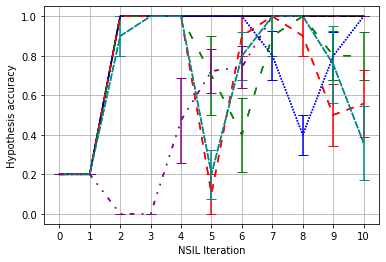

<Figure size 432x288 with 0 Axes>

In [46]:
plot(example, dataset=dataset, save_name=f'{example_name}_{dataset}_reducing_lambda.pdf')

## HS MNIST

In [12]:
# Example directory
example_name = 'hitting_sets'
dataset = 'HS_mnist'
example = '../../../examples/'+example_name

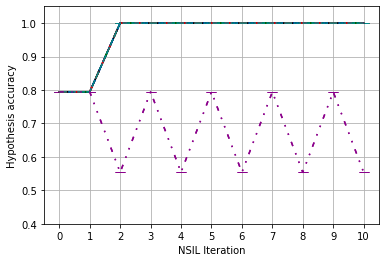

<Figure size 432x288 with 0 Axes>

In [13]:
plot(example, dataset=dataset, save_name=f'{example_name}_{dataset}_reducing_lambda.pdf', pct=100, y_lim=[0.4, 1.05])

## HS FashionMNIST

In [10]:
dataset = 'HS_fashion_mnist'

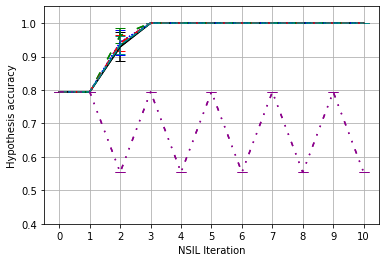

<Figure size 432x288 with 0 Axes>

In [11]:
plot(example, dataset=dataset, save_name=f'{example_name}_{dataset}_fashion_mnist_reducing_lambda.pdf', pct=100, y_lim=[0.4, 1.05])